In [35]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torchvision
from torchvision import transforms
import torchvision.datasets as dset
import torch
from PIL import Image
import PIL

import matplotlib.patches as patches
import matplotlib.pyplot as plt
from torch.utils.data import Subset, DataLoader,Dataset
import torch.nn as nn
import kornia
import random
import torch.nn.functional as F
from facenet_pytorch import MTCNN
import cv2
import os
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [36]:
mtcnn = MTCNN(margin=40, keep_all=True, device=device,post_process=False)


<class 'numpy.ndarray'>


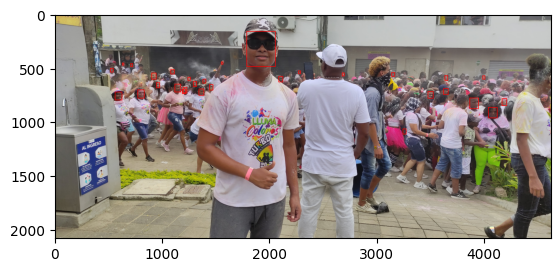

In [99]:
img_path = 'momento.jpg'

img = cv2.imread(img_path)
print(type(img))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

frame = Image.fromarray(img)



boxes, probs, landmarks = mtcnn.detect(frame, landmarks=True)

#Eliminating detection with a prob less than 80 percent

probsFilter = probs > 0.80

boxes = boxes[probsFilter]
landmarks=landmarks[probsFilter]




fig = plt.figure()
ax = fig.add_subplot(111)

draw = PIL.ImageDraw.Draw(frame)


for box, landmark in zip(boxes, landmarks):
    #ax.scatter(*np.meshgrid(box[[0, 2]], box[[1, 3]]))

    draw.rectangle(box.tolist(), outline=(255, 0, 0), width=6)
   #ax.scatter(landmark[:, 0], landmark[:, 1], s=8)

ax.imshow(frame)


In [100]:
faces = mtcnn(Image.fromarray(img))



fig, axes = plt.subplots(1, len(faces))

iter = [axes] if len(faces) == 1 else axes

for face, ax in zip(faces, iter):
    ax.imshow(face.permute(1, 2, 0).int().numpy())
    ax.axis('off')
fig.show()

/tmp/ipykernel_5115/1152411531.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
